In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")



In [2]:
# Get the number of rows and columns in the dataset
print(train_data.shape)

# Display the column names
print(train_data.columns)

# Show the first few rows of the dataset
print(train_data.head())


(8523, 12)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household  

In [3]:
attributes_with_missing = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
                           'Item_Type', 'Item_MRP', 'Outlet_Identifier',
                           'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
                           'Outlet_Type', 'Item_Outlet_Sales']

# Iterate over each attribute

for attribute in attributes_with_missing:
    # Check for missing values
    missing_count = train_data[attribute].isnull().sum()
    total_count = len(train_data)
    missing_percentage = (missing_count / total_count) * 100
    
    print(f"Missing values in {attribute}: {missing_count} ({missing_percentage:.2f}%)")

    if attribute == 'Item_Weight':
        # Impute missing values with mean
        mean_value = train_data[attribute].mean()
        train_data[attribute].fillna(mean_value, inplace=True)
    elif attribute == 'Outlet_Size':
        # Impute missing values with mode
        mode_value = train_data[attribute].mode()[0]
        train_data[attribute].fillna(mode_value, inplace=True)
    else:
        # Drop rows with missing values for other attributes
        train_data.dropna(subset=[attribute], inplace=True)
    

Missing values in Item_Identifier: 0 (0.00%)
Missing values in Item_Weight: 1463 (17.17%)
Missing values in Item_Fat_Content: 0 (0.00%)
Missing values in Item_Visibility: 0 (0.00%)
Missing values in Item_Type: 0 (0.00%)
Missing values in Item_MRP: 0 (0.00%)
Missing values in Outlet_Identifier: 0 (0.00%)
Missing values in Outlet_Establishment_Year: 0 (0.00%)
Missing values in Outlet_Size: 2410 (28.28%)
Missing values in Outlet_Location_Type: 0 (0.00%)
Missing values in Outlet_Type: 0 (0.00%)
Missing values in Item_Outlet_Sales: 0 (0.00%)


In [4]:
for attribute in attributes_with_missing:
    # Check for missing values
    missing_count = train_data[attribute].isnull().sum()
    total_count = len(train_data)
    missing_percentage = (missing_count / total_count) * 100
    
    print(f"Missing values in {attribute}: {missing_count} ({missing_percentage:.2f}%)")

Missing values in Item_Identifier: 0 (0.00%)
Missing values in Item_Weight: 0 (0.00%)
Missing values in Item_Fat_Content: 0 (0.00%)
Missing values in Item_Visibility: 0 (0.00%)
Missing values in Item_Type: 0 (0.00%)
Missing values in Item_MRP: 0 (0.00%)
Missing values in Outlet_Identifier: 0 (0.00%)
Missing values in Outlet_Establishment_Year: 0 (0.00%)
Missing values in Outlet_Size: 0 (0.00%)
Missing values in Outlet_Location_Type: 0 (0.00%)
Missing values in Outlet_Type: 0 (0.00%)
Missing values in Item_Outlet_Sales: 0 (0.00%)


In [5]:
attribute = 'Item_Outlet_Sales'

# Calculate the 95th percentile and 99th percentile
percentile_95 = np.percentile(train_data[attribute], 95)
percentile_99 = np.percentile(train_data[attribute], 99)

print(f"95th Percentile: {percentile_95}")
print(f"99th Percentile: {percentile_99}")


95th Percentile: 5522.811
99th Percentile: 7366.011720000013


In [6]:
import numpy as np
from scipy.stats.mstats import winsorize

# Specify the attributes to check for outliers
continuous_attributes = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Iterate over each continuous attribute
for attribute in continuous_attributes:
    # Calculate the 99th percentile
    percentile_99 = np.percentile(train_data[attribute], 99)
    
    # Identify the outliers
    outliers = train_data[attribute] > percentile_99
    
    # Winsorize the outliers
    train_data[attribute] = np.where(outliers, percentile_99, train_data[attribute])




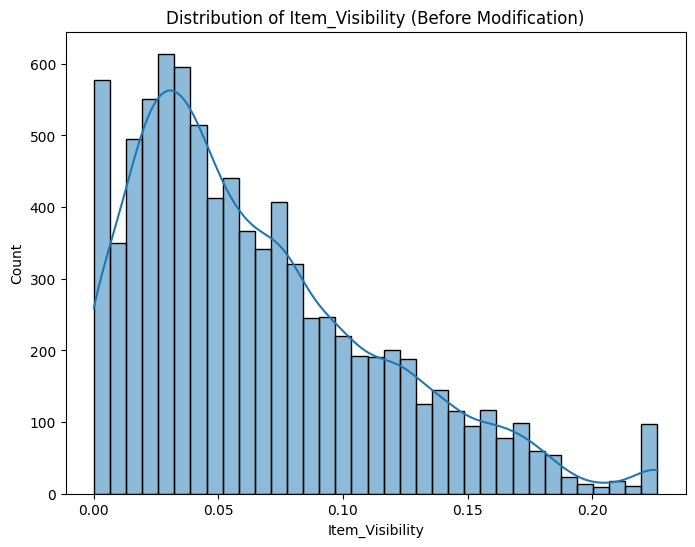

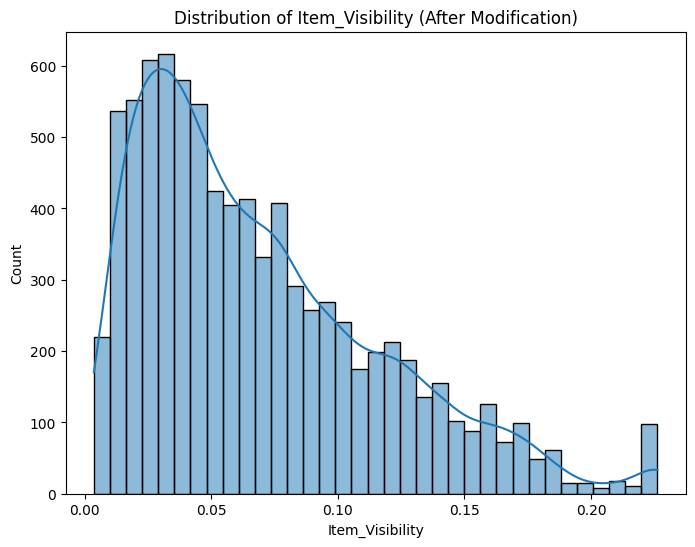

In [7]:

# Plot distribution of Item_Visibility before modification
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Visibility'], kde=True)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.title('Distribution of Item_Visibility (Before Modification)')
plt.show()

# Calculate mean visibility for each product
mean_visibility = train_data.groupby('Item_Identifier')['Item_Visibility'].mean()

# Replace 0 values with mean visibility for each product
train_data['Item_Visibility'] = train_data.apply(lambda row: mean_visibility[row['Item_Identifier']]
                                                if row['Item_Visibility'] == 0 else row['Item_Visibility'], axis=1)

# Plot distribution of Item_Visibility after modification
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Visibility'], kde=True)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.title('Distribution of Item_Visibility (After Modification)')
plt.show()


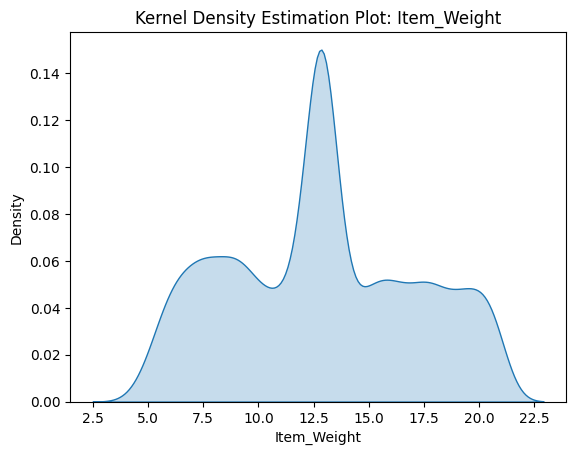

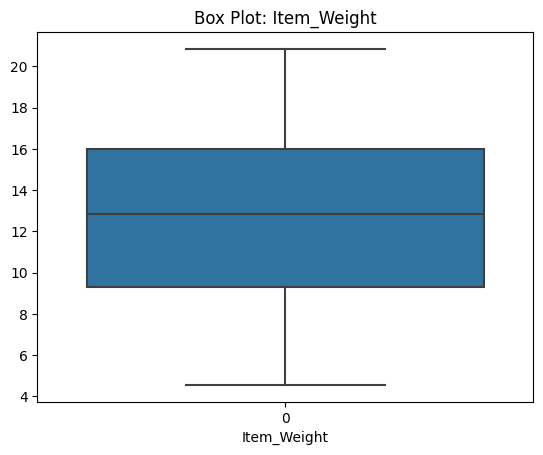

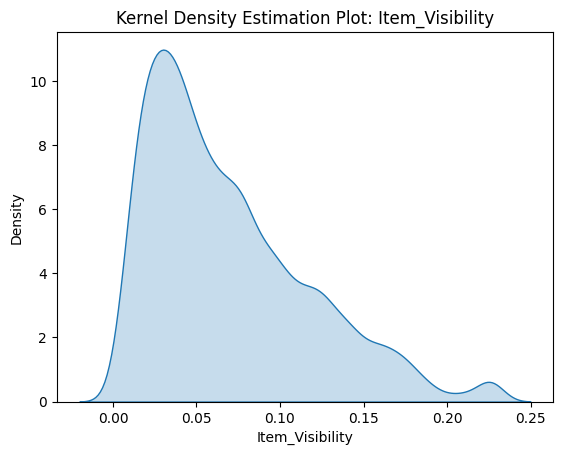

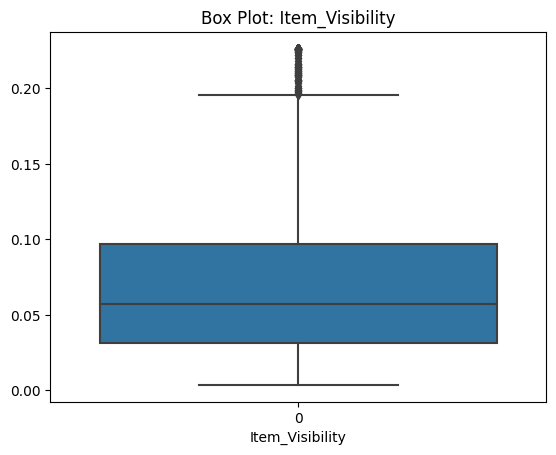

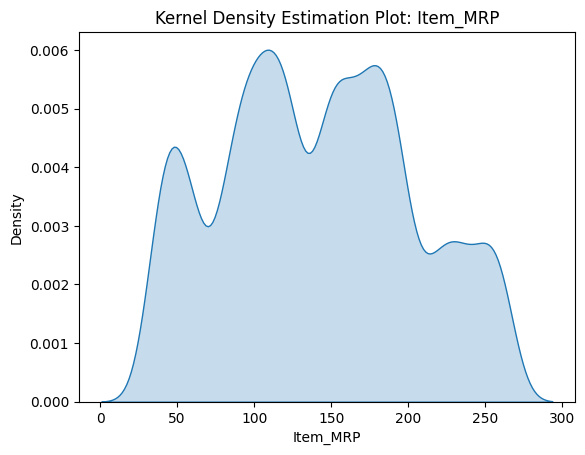

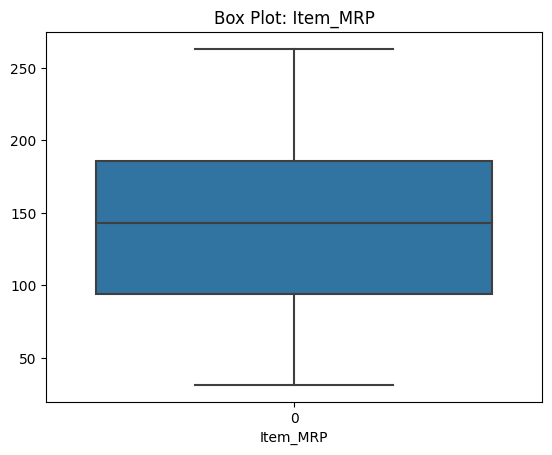

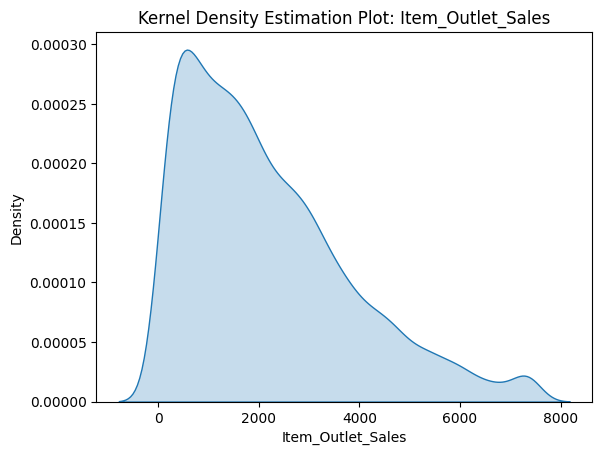

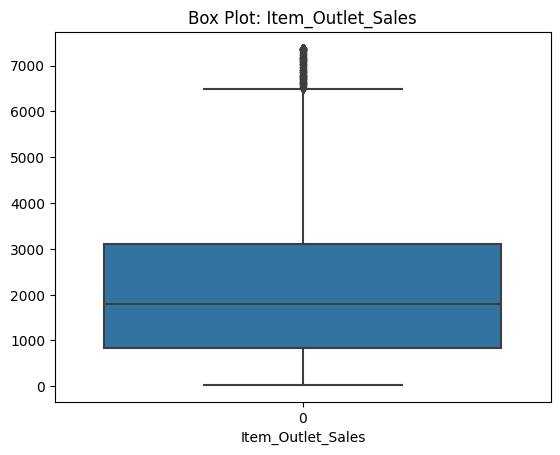

In [8]:
continuous_attrs = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# EDA for continuous attributes
for attr in continuous_attrs:
    # KDE plot
    sns.kdeplot(train_data[attr], fill=True)
    plt.xlabel(attr)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation Plot: {attr}')
    plt.show()

    # Box plot
    sns.boxplot(train_data[attr])
    plt.xlabel(attr)
    plt.title(f'Box Plot: {attr}')
    plt.show()


In [9]:
print(train_data['Item_Type'].dtype)
print(train_data['Item_Type'].value_counts())


object
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


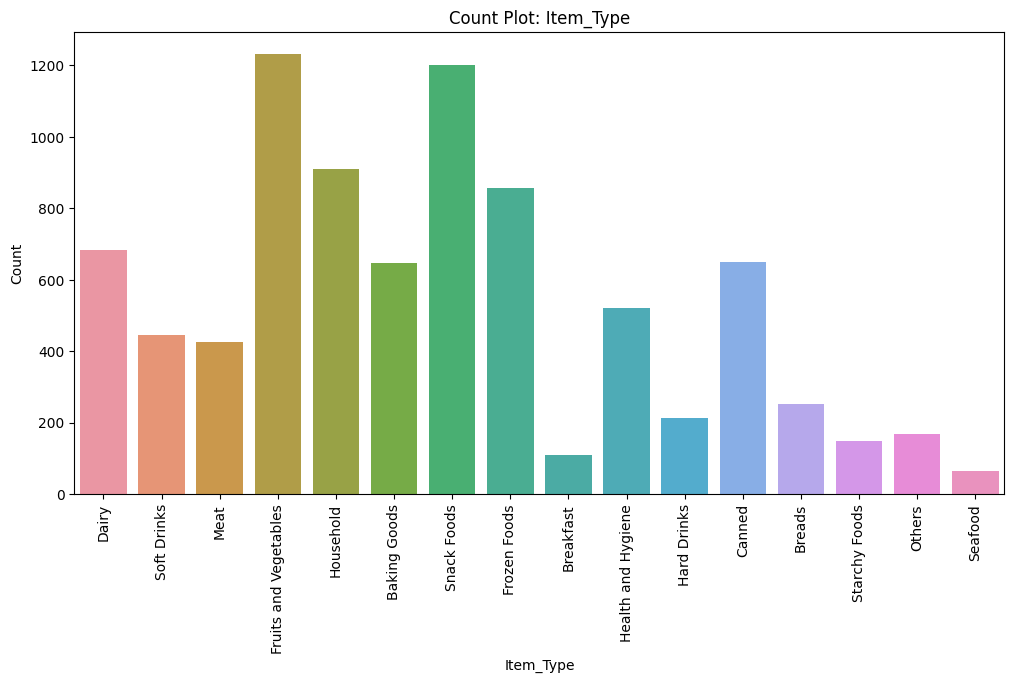

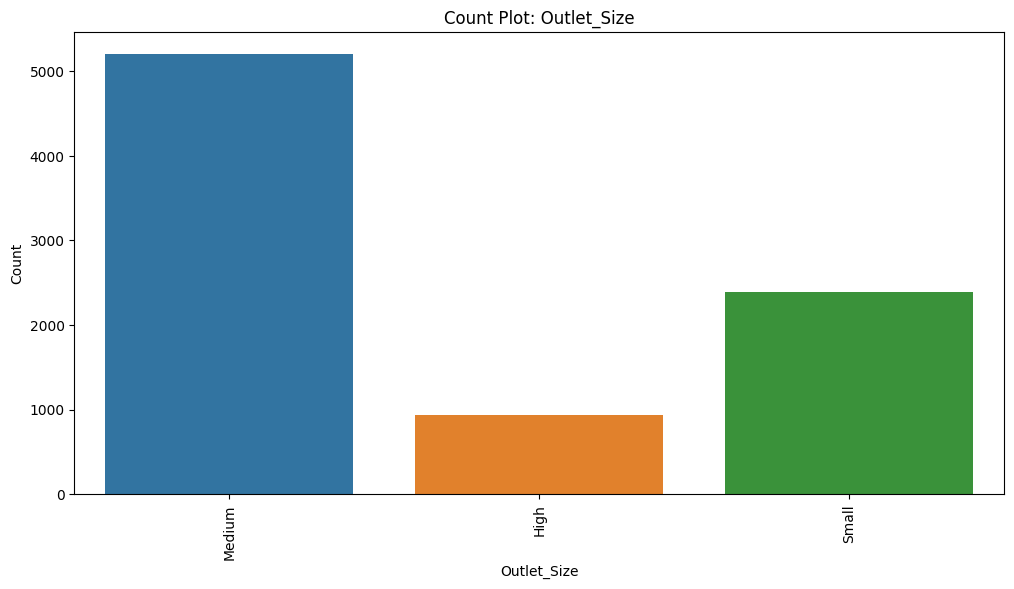

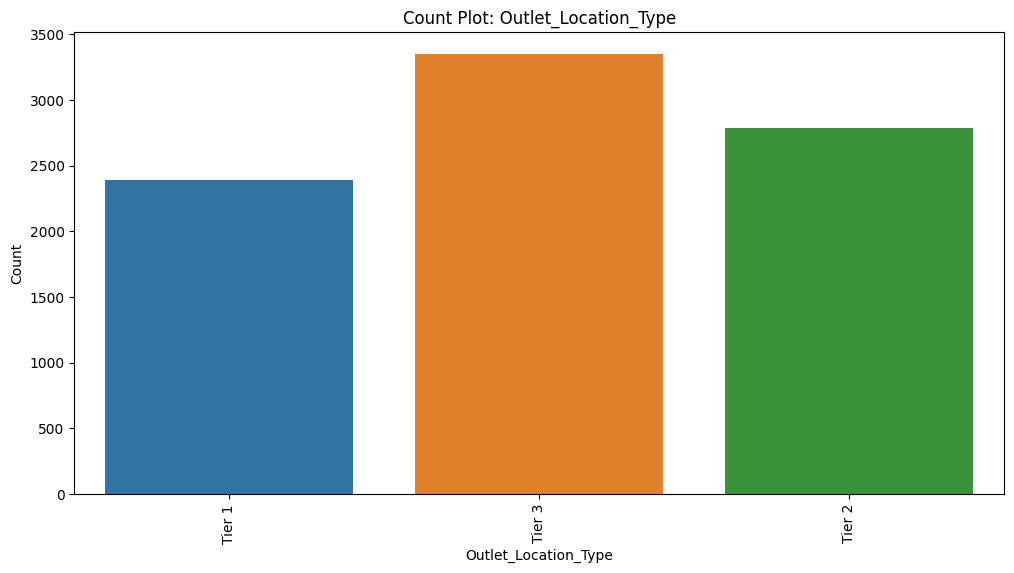

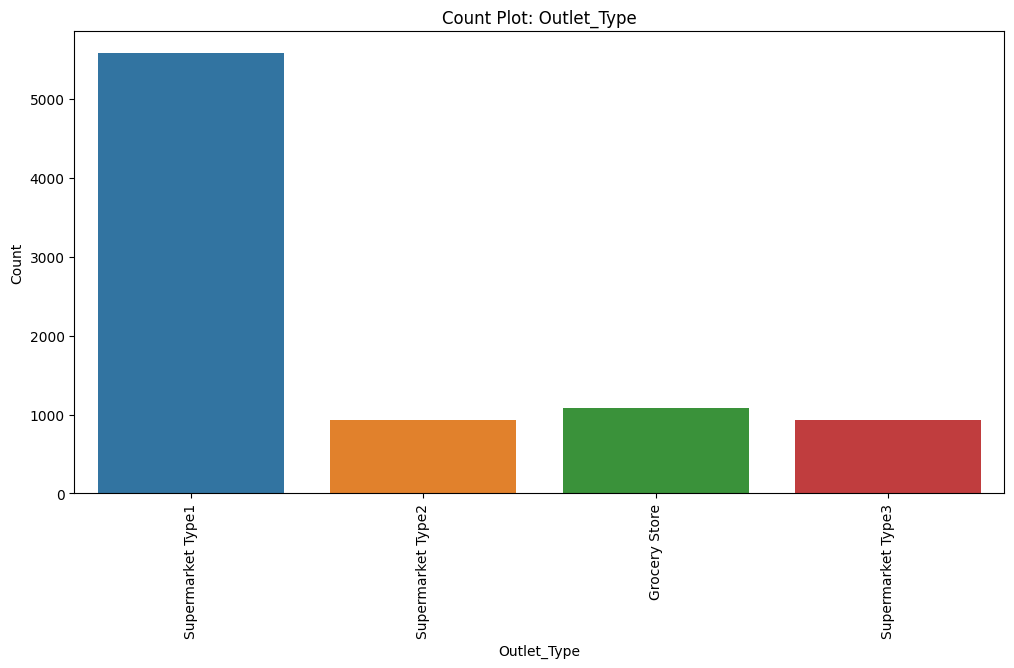

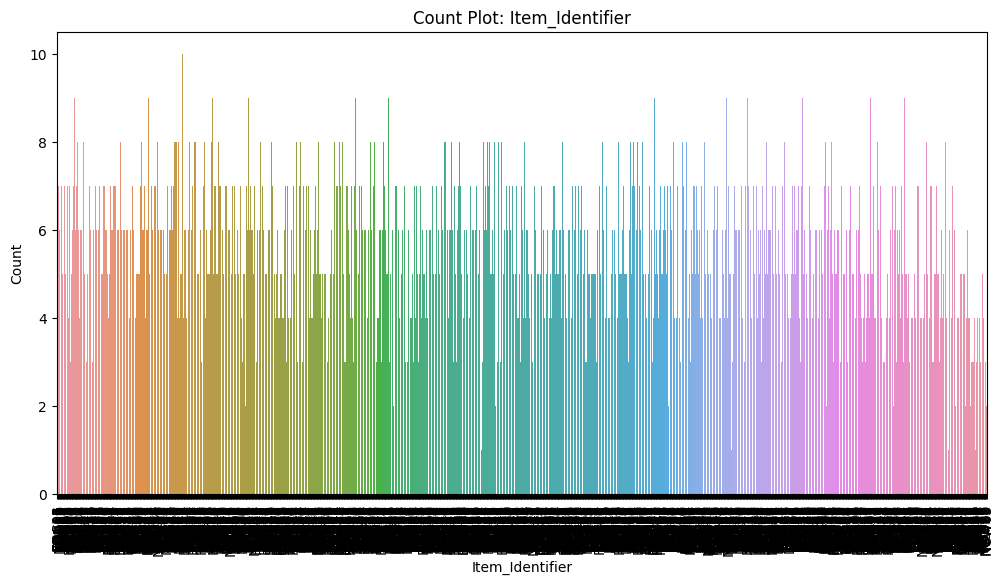

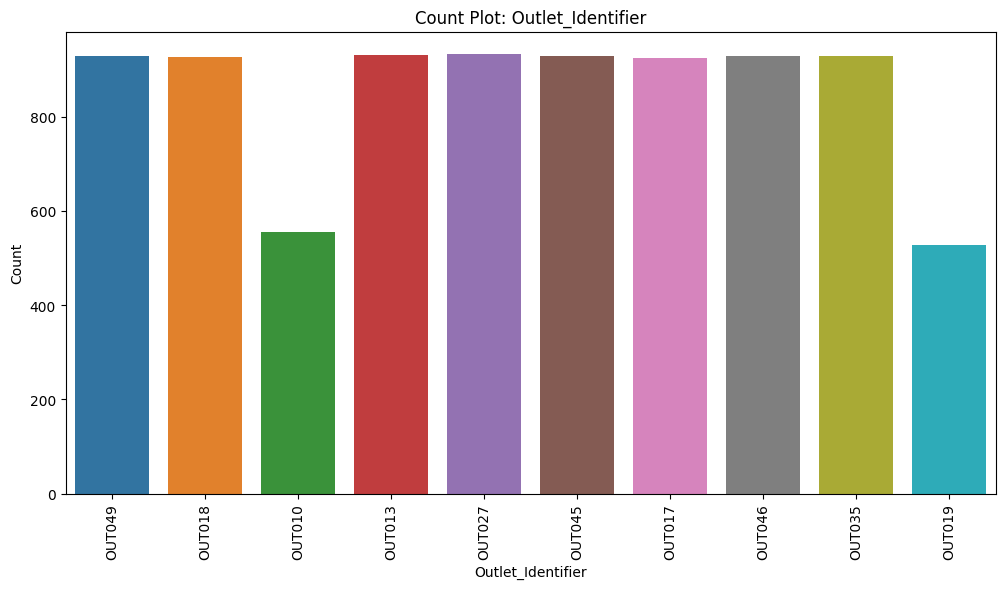

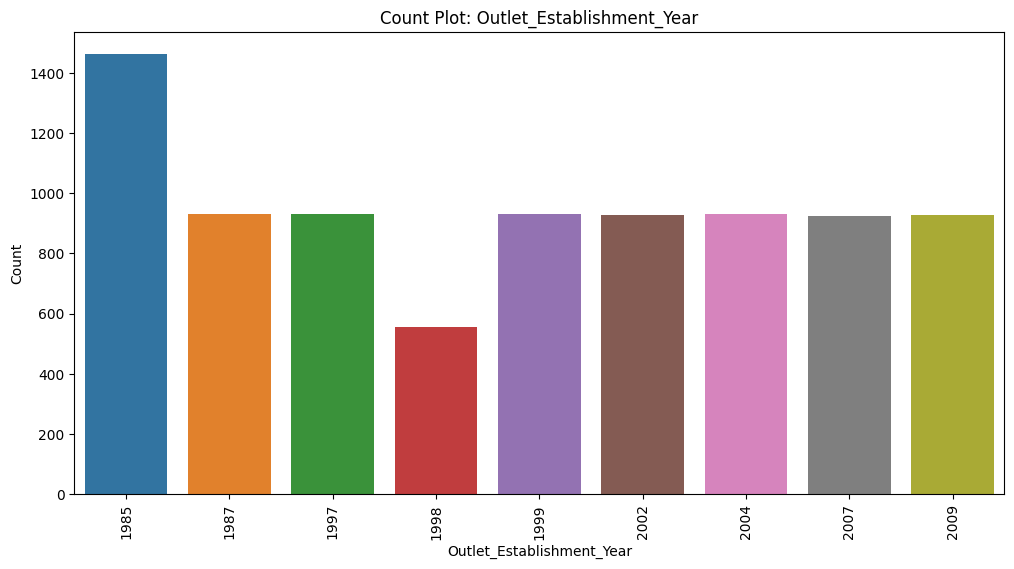

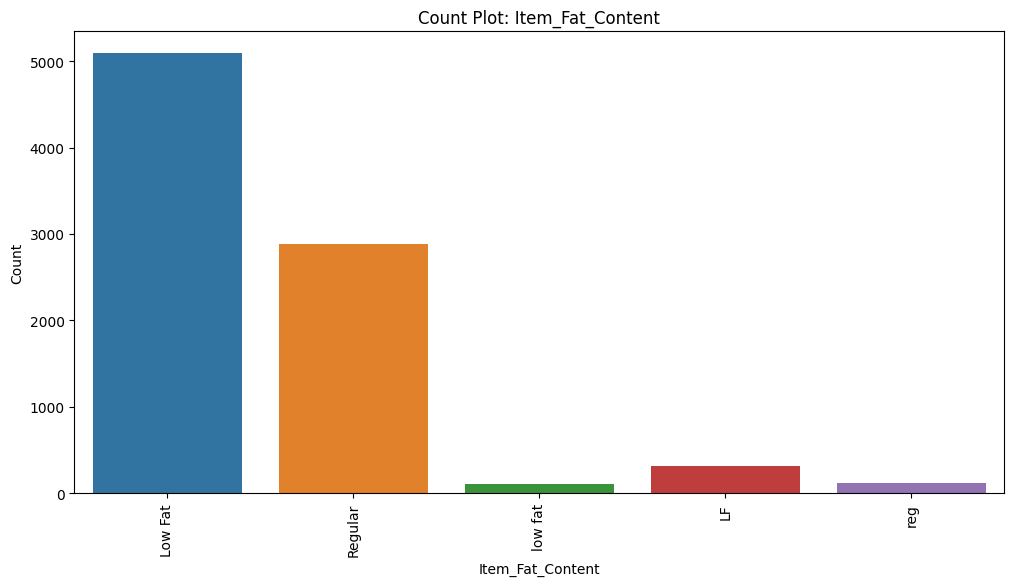

In [10]:
categorical_cols = ["Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Fat_Content']

for col in categorical_cols:
    try:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=train_data, x=col)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'Count Plot: {col}')
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print(f"Error plotting {col}: {e}")


In [11]:
# Merge categories in Item_Fat_Content
train_data["Item_Fat_Content"] = train_data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")
train_data["Item_Fat_Content"] = train_data["Item_Fat_Content"].replace("reg", "Regular")
# Merge categories in Item_Fat_Content
test_data["Item_Fat_Content"] = test_data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")
test_data["Item_Fat_Content"] = test_data["Item_Fat_Content"].replace("reg", "Regular")


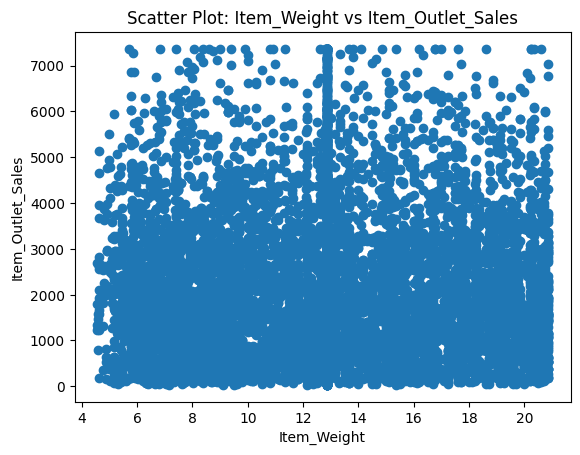

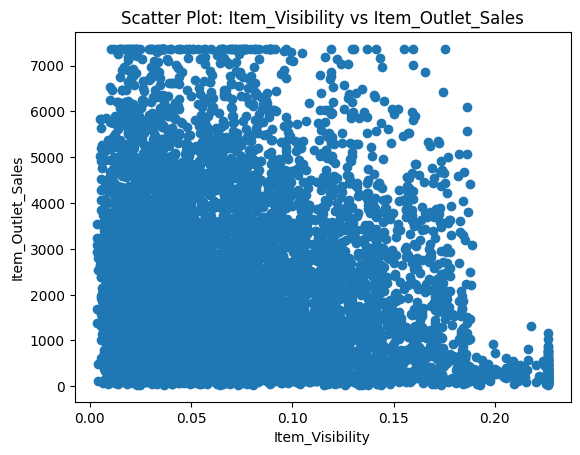

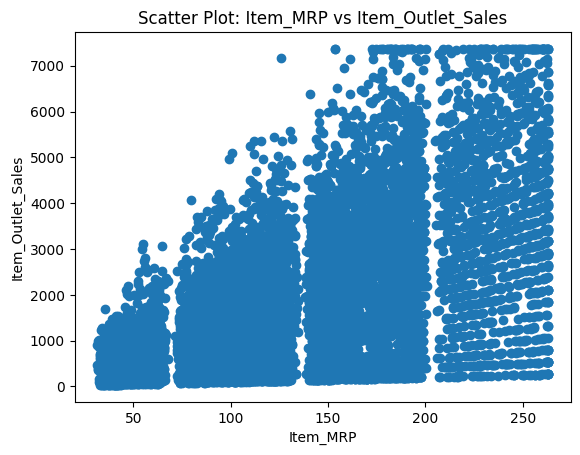

In [12]:


continuous_attributes = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

for attribute in continuous_attributes:
    plt.scatter(train_data[attribute], train_data['Item_Outlet_Sales'])
    plt.xlabel(attribute)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(f'Scatter Plot: {attribute} vs Item_Outlet_Sales')
    plt.show()


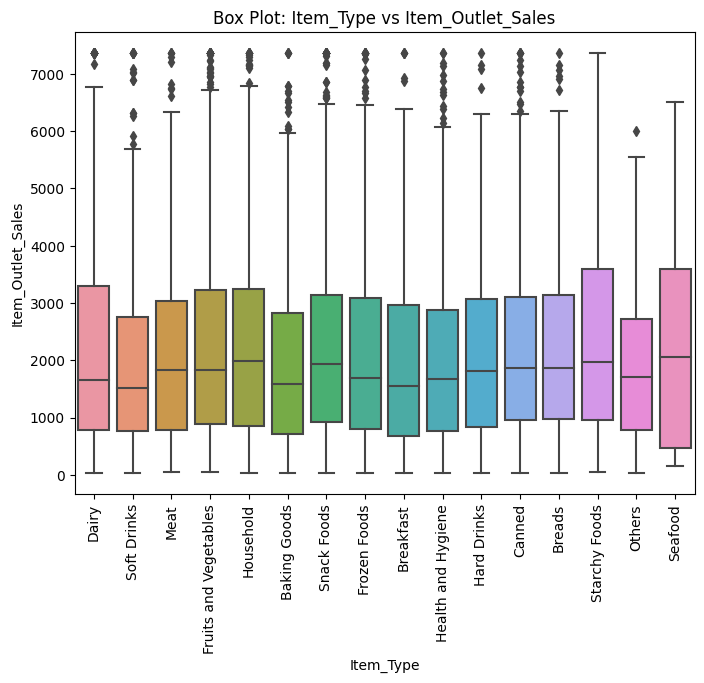

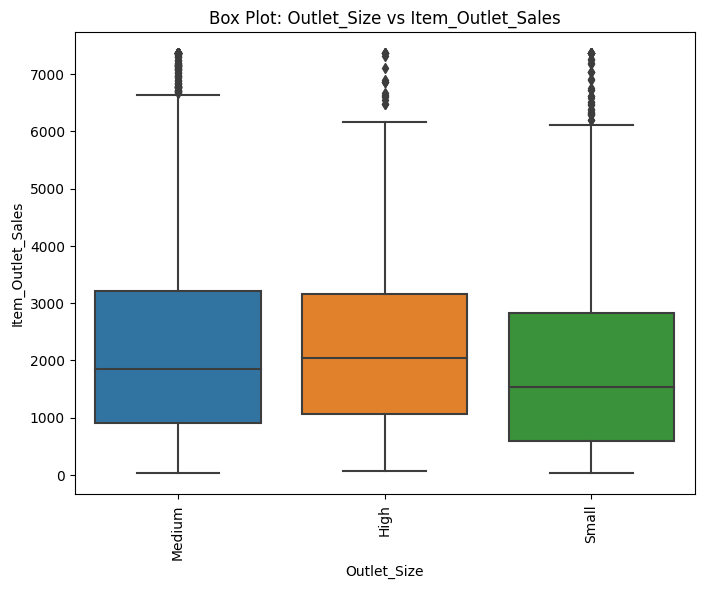

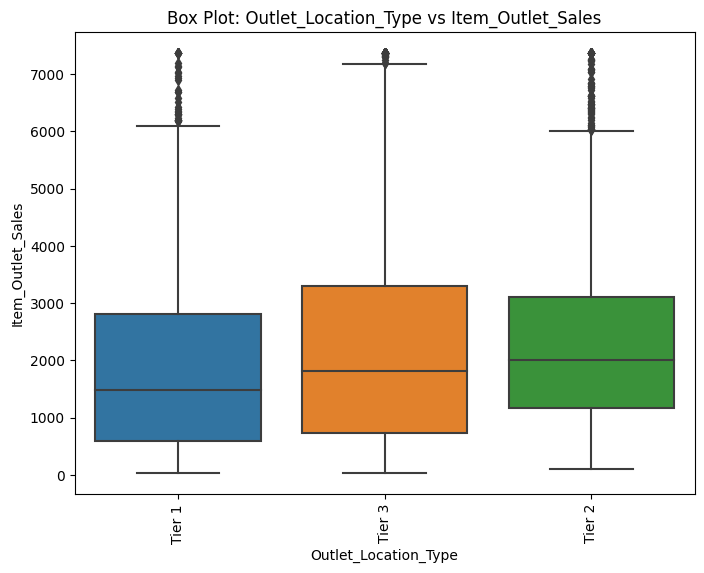

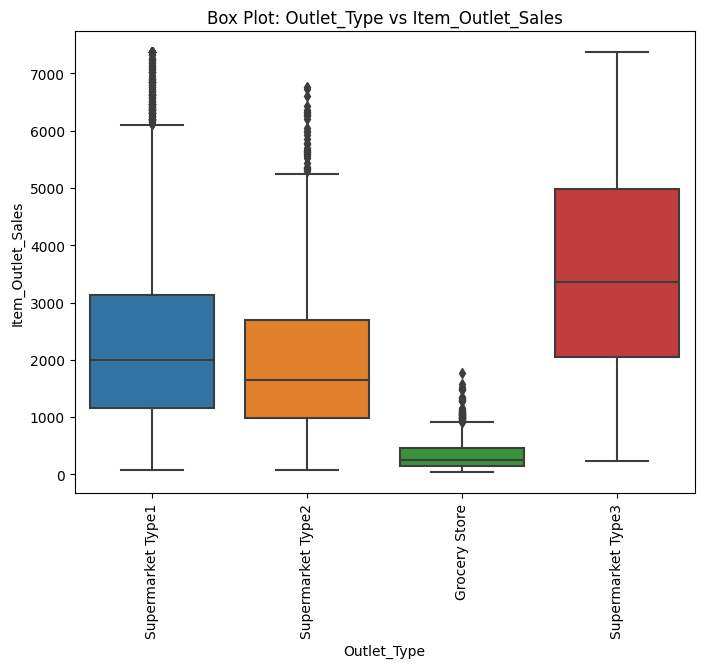

In [13]:
categorical_attributes = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for attribute in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=attribute, y='Item_Outlet_Sales', data=train_data)
    plt.xlabel(attribute)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(f'Box Plot: {attribute} vs Item_Outlet_Sales')
    plt.xticks(rotation=90)
    plt.show()


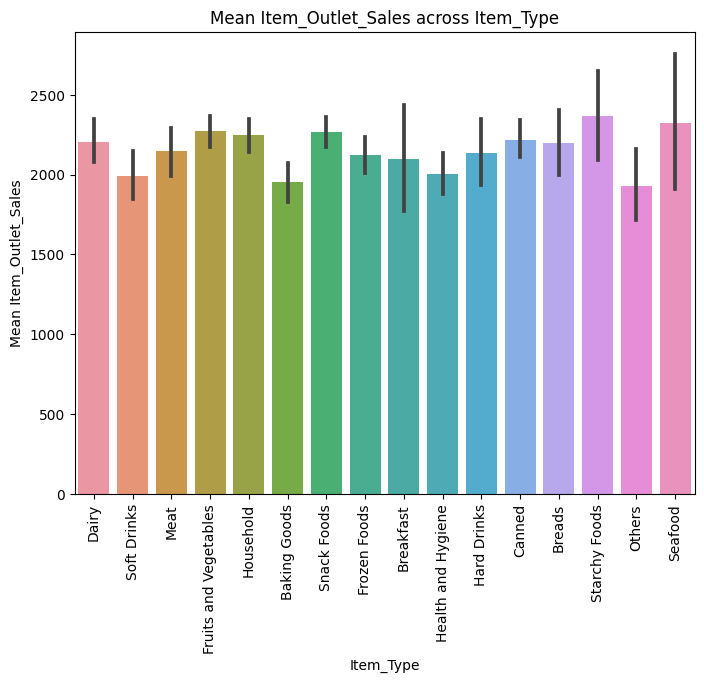

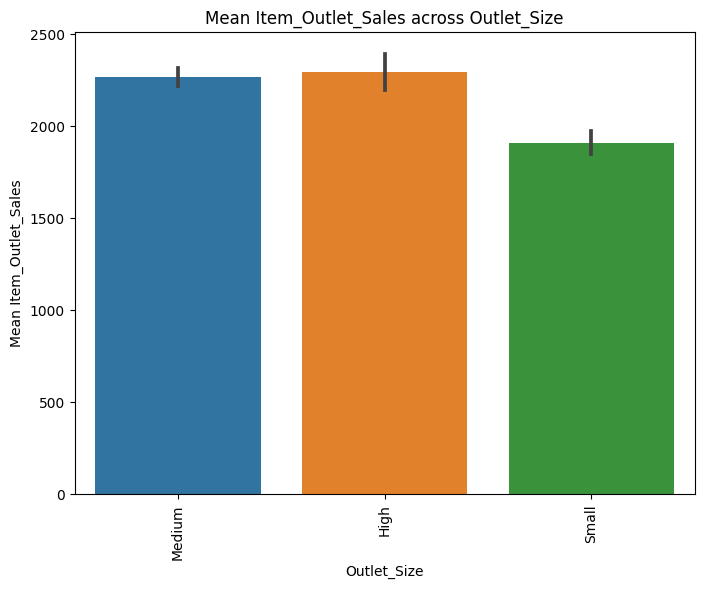

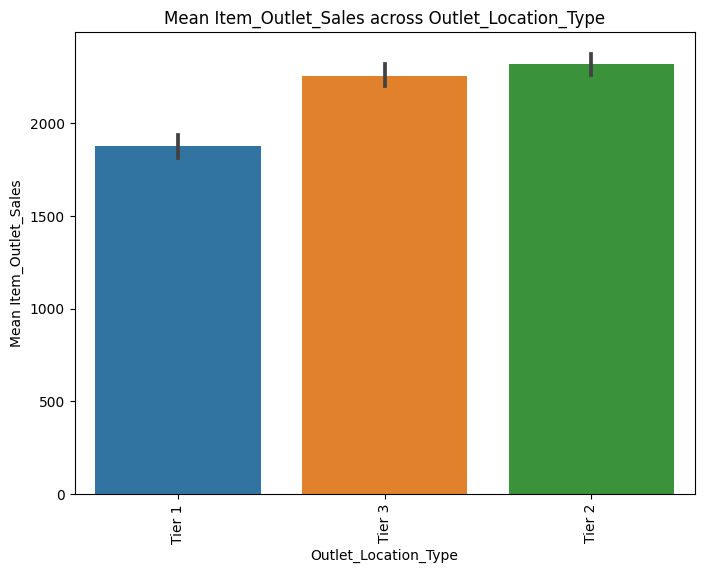

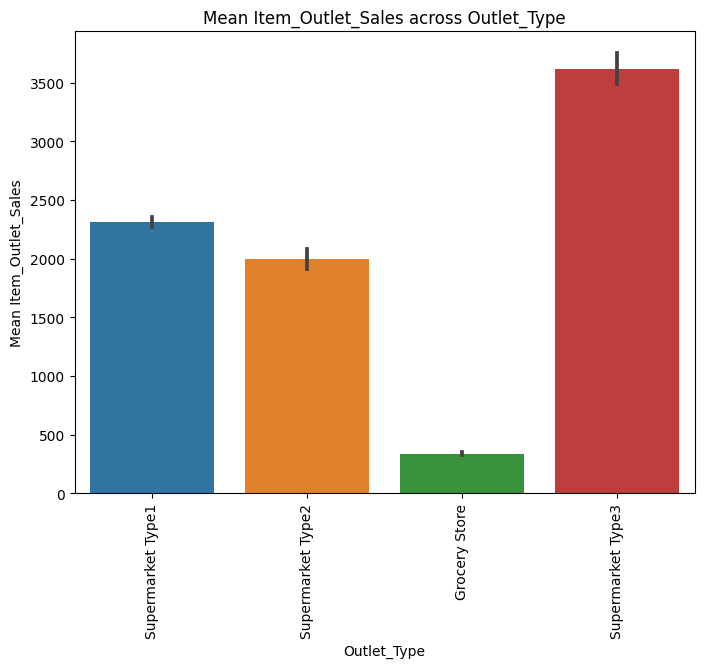

In [14]:
for attribute in categorical_attributes:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=attribute, y='Item_Outlet_Sales', data=train_data)
    plt.xlabel(attribute)
    plt.ylabel('Mean Item_Outlet_Sales')
    plt.title(f'Mean Item_Outlet_Sales across {attribute}')
    plt.xticks(rotation=90)
    plt.show()



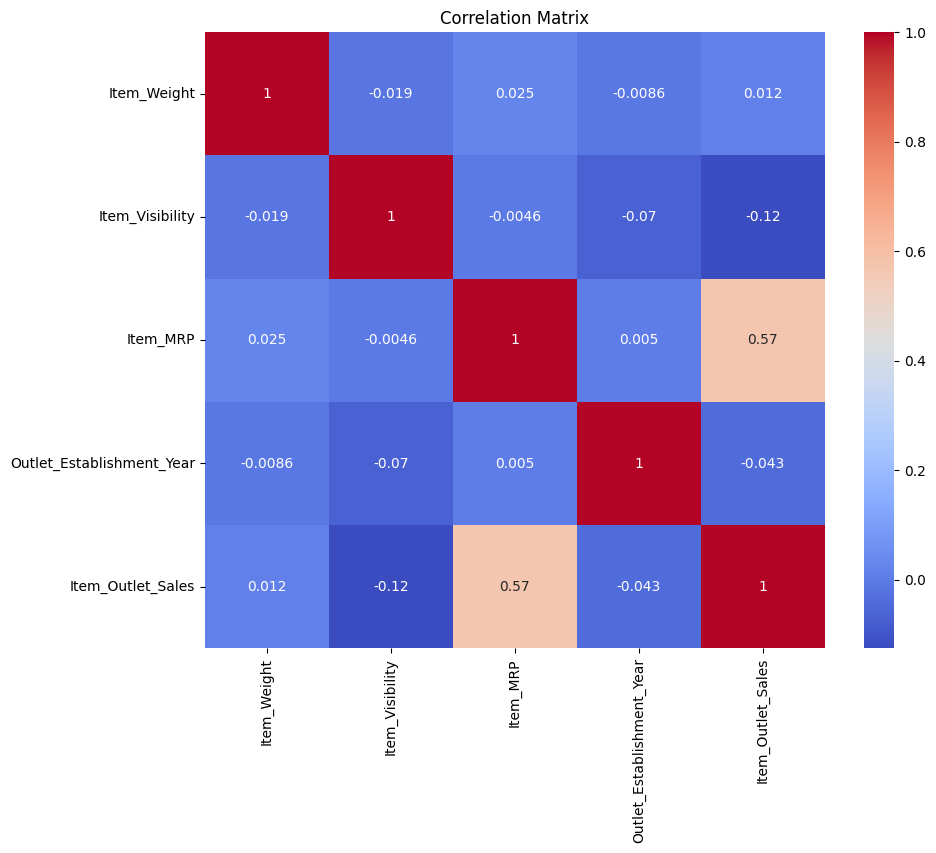

In [15]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



I noticed in the scatter plot that Item_Visibility: (The % of total display area of all products in a store allocated to the particular product) greater thab 0.18 had significantly lower item_outlet_Sales than the rest. The relationship between "Item_Visibility" and "Item_Outlet_Sales" may be non-linear or have a threshold effect. We will create a binary feature indicating whether the "Item_Visibility" is greater than 0.18 or not. This new feature might help the model better capture the impact of visibility on sales.

In [16]:
# Create new feature "Visibility_Threshold"
train_data['Visibility_Threshold'] = train_data['Item_Visibility'].apply(lambda x: 1 if x > 0.18 else 0)


I also noticed that Grocery_store outlet_Type had significantly lower mean_item_outlet_sales compared to the rest of the categories in the outlet_Type. Now performing a targeted analysis on the data specific to the "Grocery_store" outlet_Type and explore patterns or trends that might explain the lower mean_item_outlet_sales


1083


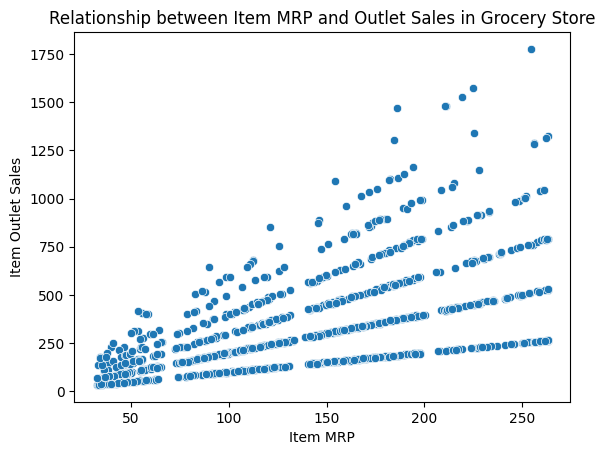

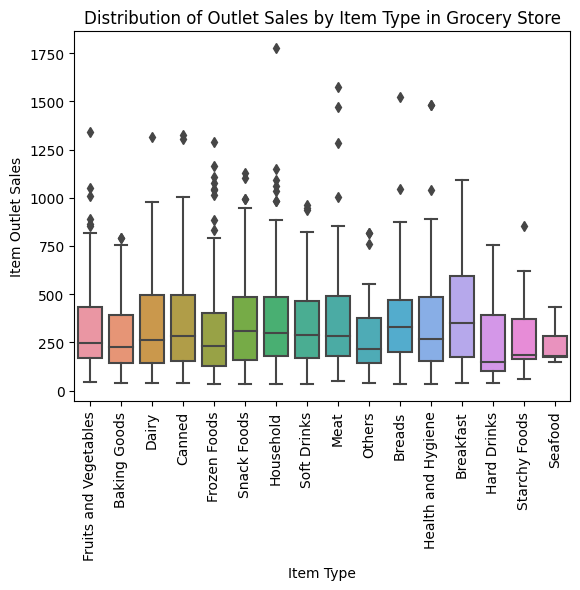

In [17]:

count = train_data['Outlet_Type'].value_counts()['Grocery Store']
print(count)

# Filter the data for "Grocery_store" outlet_Type
grocery_data = train_data[train_data['Outlet_Type'] == 'Grocery Store']

# Analyze relationships between attributes and mean_item_outlet_sales
# For example, you can use scatter plots, box plots, or other visualizations
sns.scatterplot(data=grocery_data, x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item MRP and Outlet Sales in Grocery Store')
plt.show()

# Identify outliers or anomalies within the subset
# You can use statistical measures or visualization techniques
# For example, box plots or calculating z-scores
sns.boxplot(data=grocery_data, x='Item_Type', y='Item_Outlet_Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Distribution of Outlet Sales by Item Type in Grocery Store')
plt.xticks(rotation=90)
plt.show()

# Evaluate model performance on the grocery_data subset
# Use appropriate evaluation metrics and compare it with overall model performance


Does not seem anything unsual. So let Grocery Store be as it is.

HASHING ENOCDING

In [18]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
print("Before Label Encoding:")
print(train_data[categorical_cols].head())
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_cols:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])
print("After Label Encoding")
print(train_data.head())



Before Label Encoding:
               Item_Type Outlet_Size Outlet_Location_Type        Outlet_Type  \
0                  Dairy      Medium               Tier 1  Supermarket Type1   
1            Soft Drinks      Medium               Tier 3  Supermarket Type2   
2                   Meat      Medium               Tier 1  Supermarket Type1   
3  Fruits and Vegetables      Medium               Tier 3      Grocery Store   
4              Household        High               Tier 3  Supermarket Type1   

  Item_Identifier Outlet_Identifier  Outlet_Establishment_Year  \
0           FDA15            OUT049                       1999   
1           DRC01            OUT018                       2009   
2           FDN15            OUT049                       1999   
3           FDX07            OUT010                       1998   
4           NCD19            OUT013                       1987   

  Item_Fat_Content  
0          Low Fat  
1          Regular  
2          Low Fat  
3          Regu

In [20]:
print(train_data.dtypes)

# Summary statistics
print(train_data.describe())

# Sample of the dataset
print(train_data.head())


Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Visibility_Threshold           int64
dtype: object
       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
count      8523.000000  8523.000000       8523.000000      8523.000000   
mean        779.714889    12.855299          0.352693         0.069222   
std         449.222377     4.221580          0.477836         0.048163   
min           0.000000     4.555000          0.000000         0.003575   
25%         395.500000     9.310000          0.000000         0.031114   
50%         783.000000    12.857645          0.000000        

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Attributes for normalization
normalize_cols = ['Item_Weight', 'Item_Visibility']

# Attributes for standardization
standardize_cols = ['Item_MRP']

# Create a MinMaxScaler for normalization
scaler = MinMaxScaler()

# Perform normalization on the selected attributes
train_data[normalize_cols] = scaler.fit_transform(train_data[normalize_cols])

# Create a StandardScaler for standardization
scaler = StandardScaler()

# Perform standardization on the selected attribute
train_data[standardize_cols] = scaler.fit_transform(train_data[standardize_cols])

# Print the updated DataFrame
print(train_data.head())


   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156     0.291194                 0         0.056013          4   
1                8     0.083768                 1         0.070522         14   
2              662     0.794415                 0         0.059214         10   
3             1121     0.898742                 1         0.052539          6   
4             1297     0.268487                 0         0.020242          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  1.748486                  9                          4            1   
1 -1.489474                  3                          8            1   
2  0.010276                  9                          4            1   
3  0.660584                  0                          3            1   
4 -1.399629                  1                          1            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Visibility_

MODEL FITTING

In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
print(train_data.head())

   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156     0.291194                 0         0.056013          4   
1                8     0.083768                 1         0.070522         14   
2              662     0.794415                 0         0.059214         10   
3             1121     0.898742                 1         0.052539          6   
4             1297     0.268487                 0         0.020242          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  1.748486                  9                          4            1   
1 -1.489474                  3                          8            1   
2  0.010276                  9                          4            1   
3  0.660584                  0                          3            1   
4 -1.399629                  1                          1            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Visibility_

In [23]:
from sklearn.linear_model import LinearRegression, Ridge


y_train = train_data['Item_Outlet_Sales']
X_train = train_data.drop("Item_Outlet_Sales", axis=1)

# Apply linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Apply regularized linear regression model (Ridge)
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

# Predict on the training data
y_pred_lr_train = lr_model.predict(X_train)
y_pred_ridge_train = ridge_model.predict(X_train)

# Calculate residuals
lr_residuals = y_train - y_pred_lr_train
ridge_residuals = y_train - y_pred_ridge_train

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Actual Values': y_train,
    'Linear Regression Predictions': y_pred_lr_train,
    'Linear Regression Residuals': lr_residuals,
    'Ridge Regression Predictions': y_pred_ridge_train,
    'Ridge Regression Residuals': ridge_residuals
})

# Print the results
print("Actual Values, Predictions, and Residuals:")
print(results_df)


Actual Values, Predictions, and Residuals:
      Actual Values  Linear Regression Predictions  \
0         3735.1380                    4269.621588   
1          443.4228                    1295.511467   
2         2097.2700                    2598.972036   
3          732.3800                    1437.906323   
4          994.7052                     674.911286   
...             ...                            ...   
8518      2778.3834                    3094.831939   
8519       549.2850                    1791.616012   
8520      1193.1136                     988.715664   
8521      1845.5976                    2020.858478   
8522       765.6700                    1158.913997   

      Linear Regression Residuals  Ridge Regression Predictions  \
0                     -534.483588                   4269.445941   
1                     -852.088667                   1295.545551   
2                     -501.702036                   2598.909629   
3                     -705.526323       

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training data
y_pred_lr_train = lr_model.predict(X_train)
y_pred_ridge_train = ridge_model.predict(X_train)

# Calculate mean squared error (MSE)
mse_lr = mean_squared_error(y_train, y_pred_lr_train)
mse_ridge = mean_squared_error(y_train, y_pred_ridge_train)

# Calculate root mean squared error (RMSE)
rmse_lr = np.sqrt(mse_lr)
rmse_ridge = np.sqrt(mse_ridge)

# Calculate R-squared
r2_lr = r2_score(y_train, y_pred_lr_train)
r2_ridge = r2_score(y_train, y_pred_ridge_train)

# Print the metrics
print("Linear Regression Metrics:")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)
print()

print("Ridge Regression Metrics:")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("R-squared:", r2_ridge)


Linear Regression Metrics:
MSE: 1336360.2063424021
RMSE: 1156.010469823869
R-squared: 0.5169406145949509

Ridge Regression Metrics:
MSE: 1336360.240173292
RMSE: 1156.0104844564742
R-squared: 0.516940602365966


In [25]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train = rf_model.predict(X_train)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb_train = xgb_model.predict(X_train)

# Print the predictions on the training data
print("Random Forest Predictions on Training Data:", y_pred_rf_train)
print("XGBoost Predictions on Training Data:", y_pred_xgb_train)

# Performance Metrics
rf_mse = mean_squared_error(y_train, y_pred_rf_train)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_train, y_pred_rf_train)

xgb_mse = mean_squared_error(y_train, y_pred_xgb_train)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_train, y_pred_xgb_train)

print("Random Forest Performance Metrics:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)

print("XGBoost Performance Metrics:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("R-squared:", xgb_r2)


[23:48:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest Predictions on Training Data: [4178.753882  604.5464   2118.14283  ... 1194.631624 1734.635372
  908.091278]
XGBoost Predictions on Training Data: [4255.5522  646.6112 2233.655  ... 1392.0935 1457.4995 1189.1846]
Random Forest Performance Metrics:
MSE: 168741.2569679081
RMSE: 410.78127631126046
R-squared: 0.939004433462973
XGBoost Performance Metrics:
MSE: 1014438.3511707076
RMSE: 1007.1933037757487
R-squared: 0.6333069750789355
